## IMPORTACIONES

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## CARGA DE DATASETS Y CREACION DE COLUMNAS EXTRAS

En esta parte cargamos los datasets y añadimos las columnas extras necesarias:
  - coexiones --> rp_conexion.csv
  - sitios --> ma_sitios.csv  --> Añadir columna de ubicacion basada en su latitud y longitud
  - personas --> datos_personas.csv --> Añadir columna edad y grupo etareo en base a su fecha de nacimiento
 

### Conexiones

In [3]:
conexiones = pd.DataFrame.from_csv("rp_conexion.csv", sep = ";")
conexiones.head(3)

C:\Users\Mercedes\AppData\Roaming\Python\Python34\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,pauta_id,sitio_id,longitud,latitud,mac_usr,fecha,hora,ip_local,ip_usr,so,navegador,url_ref,tiempo_espera,ancho,alto
codigo,,,,,,,,,,,,,,,
1,11,2,NaN,NaN,94:01:C2:97:96:CB,2015-05-15,20:16:35,10.5.8.1,10.5.10.95,Android,SAFARI,http://10.5.8.1/status,00:00:00,NaN,NaN
2,5,2,NaN,NaN,8C:BF:A6:17:60:A0,2015-05-15,20:18:15,10.5.8.1,10.5.9.24,Android,CHROME,http://10.5.8.1/status,00:00:00,NaN,NaN
3,19,3,NaN,NaN,74:AA:FE:A5:7E:90,2015-05-15,20:18:24,10.5.0.1,10.5.0.176,Android,CHROME,http://10.5.0.1/status,00:00:00,NaN,NaN


### Sitios 

In [4]:
sitios = pd.DataFrame.from_csv("ma_sitios2.csv", sep = ",")

Funcion de localizar, recibe toda la columna y en base a una lista de ubicaciones, determina a cual de ella pertenece el registro

In [5]:
def localizar(row):
    places =[["Urdesa", [[-79.915581,-2.178119], [-79.901204,-2.146938]]],
             ["MallSur", [[-79.902062,-2.232042], [-79.894681,-2.226038]]],
             ["CityMall", [[-79.912663,-2.143936], [-79.905968,-2.137932]]],
             ["AlbanBorja", [[-79.918242,-2.170096], [-79.915066,-2.167523]]],
             ["Samborondon", [[-79.874897,-2.160447], [-79.852066,-2.116704]]],
             ["Aeropuerto", [[-79.886227,-2.152728], [-79.880562,-2.146338]]],
             ["Penias", [[-79.8776014239,-2.1855487464], [-79.873009,-2.175392]]],
             ["Quito", [[-78.586922,-0.395161], [-78.274155,0.021973]]],
             ["CentroConvenciones", [[-79.893479,-2.161755], [-79.883652,-2.154894]]],
             ["HiltonColon", [[-79.8998951912,-2.160929558], [-79.8962903023,-2.1576274229]]],
             ["MallSol", [[-79.8954641819,-2.157053837], [-79.8891341686,-2.1539258197]]],
             ["UniversidadGuayaquil", [[-79.9008607864,-2.1847947751], [-79.8959684372,-2.1791554991]]]
            ]


    longitud = float(row["longitud"])
    latitud = float(row["latitud"])

    for placeName, ubicacion in places:
        SW, NE= ubicacion
#         NE[0], NE[1] = (NE[1], NE[0])
#         SW[0], SW[1] = (SW[1], SW[0])
        # longitud, latitud
        # -2.167496";"-79.917998
        # SW[-79.917998,-2.170332], NE[-79.916062, -2.167310]
        if (latitud <= NE[0] and longitud <=NE[1] and latitud >= SW[0] and longitud >= SW[1]):
            return placeName
    return "No ubicado"

Aplicando la funcion al dataframe

In [6]:
sitios['localizacion'] = sitios[["longitud", "latitud"]].apply(lambda row: localizar(row), axis = 1)
sitios = sitios.reset_index()
sitios.head(3)

,sitio_id,nombre,siglas,ruc,ciudad,nombre_ubicacion,contacto,direccion,email,telefono,...,longitud,latitud,ip,puerto,fecha,usuario_modif,bienvenida,formulario,router,localizacion
0,1,ALBAN BORJA,ALBAN BORJ,920124541001,Guayaquil,Guayaquil,Fabricio Matamoros,Av. Carlos Julio Arosemena,administracion@albanborja.com,923154211,...,-2.168677,-79.916769,186.3.137.95,NaN,2016-09-19 13:28:32,fmatamoros,0,0,Mikrotik,AlbanBorja
1,2,VILLAGE PLAZA,VILLA,0,Guayaquil,Guayaquil,Gabriela,SAMBORONDON,NaN,NaN,...,-2.140406,-79.866376,186.3.144.18,NaN,2016-07-20 17:23:50,fmatamoros,0,0,NaN,Samborondon
2,3,CITY MALL,CITY M.,0,Guayaquil,Guayaquil,Gabriela,Alborada,NaN,NaN,...,-2.140951,-79.911774,186.3.153.140,NaN,2015-12-22 10:21:54,fmatamoros,0,0,NaN,CityMall


###  Personas

In [45]:
personas = pd.DataFrame.from_csv("datos_personas.csv", sep = ";")
personas.head()

,nombre,apellido,email,telefono,fnacimiento,sexo,captura
codigo,,,,,,,
1,Jhon,Peñafiel Monserrate,mmatamoros@epunemi.com,NaN,2000-08-09,Masculino,fb
2,Andres Y,Diana,dianayandres8mayo@gmail.com,NaN,1993-10-16,Masculino,fb
3,Kelly,Sobenis,kelly_ilove23@hotmail.com,NaN,1993-09-23,Femenino,fb
4,Adriana,Pillasagua,lachinapoderosa@hotmail.com,NaN,1994-09-10,Femenino,fb
5,Elizabeth,Aviles,itsbel1995@gmail.com,NaN,1995-04-09,Femenino,fb



Funcion de calcular edad recibe el registro y agrega dos columnas edad y categoria, que se calculan en base al año de nacimiento

In [37]:
def calcularEdad(row):
    import datetime
    import pandas as pd
    actual = datetime.datetime.now()
    fnacimiento = row["fnacimiento"]
    if len(fnacimiento.split("-")) == 3:
        nac = datetime.datetime.strptime(fnacimiento, '%Y-%m-%d')
    else:
        nac = datetime.datetime.strptime(fnacimiento +"-01-01", '%Y-%m-%d')
    edad = actual.year - nac.year
    mes = actual.month - nac.month
    dia = actual.day - nac.day
    if mes < 0 or (mes == 0 and dia < 0):
        edad -= 1
    row["edad"] = edad
    if edad <= 12:
        row["categorias"]= "niños"
    elif edad <= 17:
        row["categorias"]= "adolescentes"
    elif edad <= 25:
        row["categorias"]= "jovenes"
    elif edad <= 64:
        row["categorias"]= "adultos"
    else:
        row["categorias"]= "adultos mayores"
    return row

personas = personas.apply(lambda row: calcularEdad(row), axis = 1).reset_index()
personas.head()

,codigo,nombre,apellido,email,telefono,fnacimiento,sexo,captura,edad,categorias
0,1,Jhon,Peñafiel Monserrate,mmatamoros@epunemi.com,NaN,2000-08-09,Masculino,fb,16,adolescentes
1,2,Andres Y,Diana,dianayandres8mayo@gmail.com,NaN,1993-10-16,Masculino,fb,23,jovenes
2,3,Kelly,Sobenis,kelly_ilove23@hotmail.com,NaN,1993-09-23,Femenino,fb,23,jovenes
3,4,Adriana,Pillasagua,lachinapoderosa@hotmail.com,NaN,1994-09-10,Femenino,fb,22,jovenes
4,5,Elizabeth,Aviles,itsbel1995@gmail.com,NaN,1995-04-09,Femenino,fb,22,jovenes


# Uniendo los Datsets

In [7]:
data = conexiones.merge(sitios, on= "sitio_id")
data.head(5)

,pauta_id,sitio_id,longitud_x,latitud_x,mac_usr,fecha_x,hora,ip_local,ip_usr,so,...,longitud_y,latitud_y,ip,puerto,fecha_y,usuario_modif,bienvenida,formulario,router,localizacion
0,11,2,NaN,NaN,94:01:C2:97:96:CB,2015-05-15,20:16:35,10.5.8.1,10.5.10.95,Android,...,-2.140406,-79.866376,186.3.144.18,NaN,2016-07-20 17:23:50,fmatamoros,0,0,NaN,Samborondon
1,5,2,NaN,NaN,8C:BF:A6:17:60:A0,2015-05-15,20:18:15,10.5.8.1,10.5.9.24,Android,...,-2.140406,-79.866376,186.3.144.18,NaN,2016-07-20 17:23:50,fmatamoros,0,0,NaN,Samborondon
2,5,2,NaN,NaN,34:BE:00:05:16:18,2015-05-15,20:20:20,10.5.8.1,10.5.8.236,Android,...,-2.140406,-79.866376,186.3.144.18,NaN,2016-07-20 17:23:50,fmatamoros,0,0,NaN,Samborondon
3,13,2,NaN,NaN,BC:6E:64:71:73:97,2015-05-15,20:22:36,10.5.8.1,10.5.8.251,Android,...,-2.140406,-79.866376,186.3.144.18,NaN,2016-07-20 17:23:50,fmatamoros,0,0,NaN,Samborondon
4,5,2,NaN,NaN,B8:6C:E8:C3:F8:C9,2015-05-15,20:29:54,10.5.8.1,10.5.9.8,Android,...,-2.140406,-79.866376,186.3.144.18,NaN,2016-07-20 17:23:50,fmatamoros,0,0,NaN,Samborondon


# Procesamiento de DataFrame

### Filtrado de columnas

Solo necesitamos para la proxima vizualizacion las columnas:
 - mac_usr
 - fecha_x
 - hora
 - so
 - navegador
 - localizacion


In [9]:
data2 = data[["mac_usr","fecha_x","hora","so", "navegador", "localizacion"]]
data2.head()

,mac_usr,fecha_x,hora,so,navegador,localizacion
0,94:01:C2:97:96:CB,2015-05-15,20:16:35,Android,SAFARI,Samborondon
1,8C:BF:A6:17:60:A0,2015-05-15,20:18:15,Android,CHROME,Samborondon
2,34:BE:00:05:16:18,2015-05-15,20:20:20,Android,SAFARI,Samborondon
3,BC:6E:64:71:73:97,2015-05-15,20:22:36,Android,CHROME,Samborondon
4,B8:6C:E8:C3:F8:C9,2015-05-15,20:29:54,Android,CHROME,Samborondon


### Añadir columnas extras

Para este caso redondearemos la hora a una hora entera y sacaremos el par año-mes

In [47]:
def filtrarLocalizacion(localizacion):
    noRelevantes =["Urdesa","Samborondon","Penias","Quito","CentroConvenciones","MallSol","UniversidadGuayaquil", "HiltonColon"]
    if localizacion in noRelevantes:
        return "Other"
    return localizacion

In [10]:
dias = {0:"Weekday", 1:"Weekday", 2:"Weekday", 3:"Weekday", 4: "Weekday", 5: "Weekend", 6: "Weekend"}
data2["hora2"] = data2["hora"].apply(lambda x: x.split(":")[0] +":00:00" )
data2["fecha2"] = data2["fecha_x"].apply(lambda x: "-".join(x.split("-")[:-1]))
data2["fechaCompleta"] = pd.to_datetime(data2["fecha_x"] + " " + data2["hora2"])
data2["weekday"] = data2["fechaCompleta"].dt.weekday
data2["categoria_dia"] = data2["weekday"].apply(lambda x: dias[int(x)])
#data2["localizacion2"] = data2["localizacion"].apply(lambda x: filtrarLocalizacion(x))
data2.head()

C:\Users\Mercedes\AppData\Roaming\Python\Python34\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mercedes\AppData\Roaming\Python\Python34\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mercedes\AppData\Roaming\Python\Python34\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,mac_usr,fecha_x,hora,so,navegador,localizacion,hora2,fecha2,fechaCompleta,weekday,categoria_dia
0,94:01:C2:97:96:CB,2015-05-15,20:16:35,Android,SAFARI,Samborondon,20:00:00,2015-05,2015-05-15 20:00:00,4,Weekday
1,8C:BF:A6:17:60:A0,2015-05-15,20:18:15,Android,CHROME,Samborondon,20:00:00,2015-05,2015-05-15 20:00:00,4,Weekday
2,34:BE:00:05:16:18,2015-05-15,20:20:20,Android,SAFARI,Samborondon,20:00:00,2015-05,2015-05-15 20:00:00,4,Weekday
3,BC:6E:64:71:73:97,2015-05-15,20:22:36,Android,CHROME,Samborondon,20:00:00,2015-05,2015-05-15 20:00:00,4,Weekday
4,B8:6C:E8:C3:F8:C9,2015-05-15,20:29:54,Android,CHROME,Samborondon,20:00:00,2015-05,2015-05-15 20:00:00,4,Weekday


### Clasificar Navegadores

In [49]:
def clasificadorNaegador(navegador):
    try:
        if str(navegador.lower()) == "otros":
            return "OTHER"
        if str(navegador.lower()) in ["ie","opera", "mozilla", "firefox"]:
            return "OTHER"
        return navegador
    except:
        return "OTHER"
data2["navegador"] = data2["navegador"].apply(lambda x: clasificadorNaegador(x))
data2.head()

C:\Users\Mercedes\AppData\Roaming\Python\Python34\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,mac_usr,fecha_x,hora,so,navegador,localizacion,hora2,fecha2,fechaCompleta,weekday,categoria_dia,localizacion2
0,94:01:C2:97:96:CB,2015-05-15,20:16:35,Android,SAFARI,Samborondon,20:00:00,2015-05,2015-05-15 20:00:00,4,Weekday,Other
1,8C:BF:A6:17:60:A0,2015-05-15,20:18:15,Android,CHROME,Samborondon,20:00:00,2015-05,2015-05-15 20:00:00,4,Weekday,Other
2,34:BE:00:05:16:18,2015-05-15,20:20:20,Android,SAFARI,Samborondon,20:00:00,2015-05,2015-05-15 20:00:00,4,Weekday,Other
3,BC:6E:64:71:73:97,2015-05-15,20:22:36,Android,CHROME,Samborondon,20:00:00,2015-05,2015-05-15 20:00:00,4,Weekday,Other
4,B8:6C:E8:C3:F8:C9,2015-05-15,20:29:54,Android,CHROME,Samborondon,20:00:00,2015-05,2015-05-15 20:00:00,4,Weekday,Other


### Clasificar Sistema Operativo

In [29]:
def clasificadorSO(so):
    try:
        if so.lower().startswith("windows"):
            return "Windows"
        if so.lower().startswith("mac"):
            return "Mac"
        if so.lower() == "android":
            return "ANDROID"
        if so.lower() == "ipad" or so.lower() == "iphone" or so.lower() == "ios" or so.lower() == "mac":
            return "iOS"
        return "Other"
    except:
        return "Other"

data2["so2"]  = data2["so"].apply(lambda x: clasificadorSO(x))
data2["so2"].value_counts()

C:\Users\Mercedes\AppData\Roaming\Python\Python34\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


ANDROID    460969
iOS        264913
Other       37431
Windows     27896
Mac          7922
Name: so2, dtype: int64

### Cantidad de Conexiones por Sistema Operativo en los diferentes sitios al pasar los Días de la semana 

Seleccionando solo las columnas necesarias y agrupando

In [50]:
data3 = data2[["mac_usr", "fecha_x", "categoria_dia", "localizacion2", "navegador"]]
dataAgrupada = data3.groupby(["fecha_x", "categoria_dia", "localizacion2", "navegador"]).count().add_prefix("count_").reset_index()
dataAgrupada = dataAgrupada.groupby(["localizacion2", "categoria_dia", "navegador"]).mean().add_prefix("mean_")
dataAgrupada["mean_count_mac_usr"] = dataAgrupada["mean_count_mac_usr"].apply(lambda x: int(round(x)))
dataAgrupada = dataAgrupada.reset_index()
dataAgrupada

,localizacion2,categoria_dia,navegador,mean_count_mac_usr
0,Aeropuerto,Weekday,CHROME,841
1,Aeropuerto,Weekday,OTHER,1036
2,Aeropuerto,Weekday,SAFARI,164
3,Aeropuerto,Weekend,CHROME,778
4,Aeropuerto,Weekend,OTHER,1033
5,Aeropuerto,Weekend,SAFARI,143
6,AlbanBorja,Weekday,CHROME,37
7,AlbanBorja,Weekday,OTHER,20
8,AlbanBorja,Weekday,SAFARI,33
9,AlbanBorja,Weekend,CHROME,22


## Visualizacion

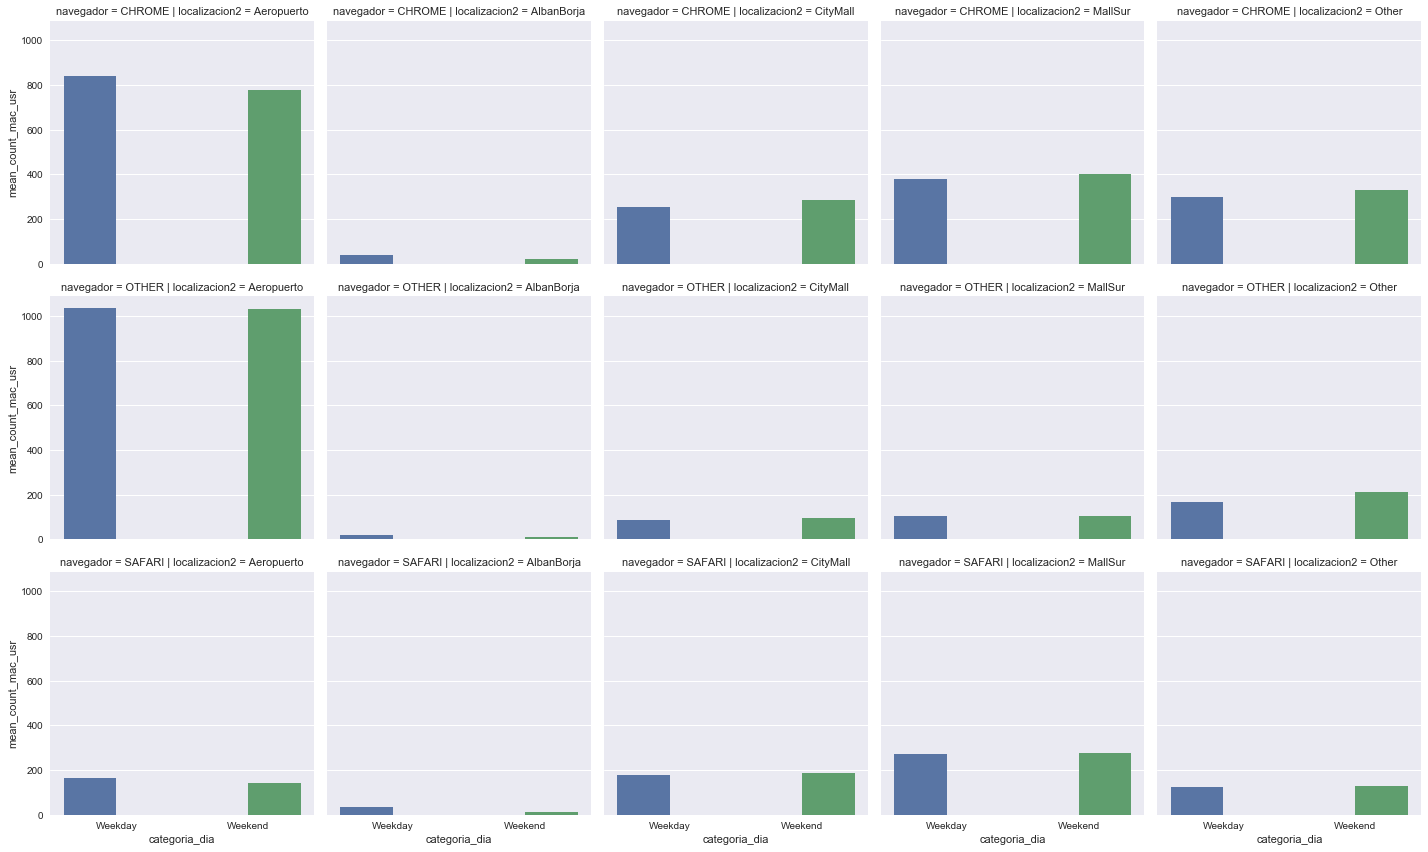

In [51]:
g = sns.factorplot(x= "categoria_dia", y ="mean_count_mac_usr" , row = "navegador",col= "localizacion2",data = dataAgrupada, kind="bar", hue = "categoria_dia")
plt.show()

In [ ]:
data4 = dataAgrupada.groupby(["localizacion", "navegador"]).sum().reset_index()
data4.head()

In [55]:
data4 = data2[["mac_usr","fecha_x", "localizacion"]]
data4 = data4.groupby(["fecha_x", "localizacion"]).count().add_prefix("count_").reset_index()
data4 = data4.groupby(["localizacion"]).mean().add_prefix("mean_").reset_index()
data4["mean_count_mac_usr"] = data4["mean_count_mac_usr"].apply(lambda x: int(round(x)))
data4

,localizacion,mean_count_mac_usr
0,Aeropuerto,2010
1,AlbanBorja,67
2,CentroConvenciones,459
3,CityMall,527
4,HiltonColon,216
5,MallSol,69
6,MallSur,758
7,Penias,38
8,Quito,21
9,Samborondon,193


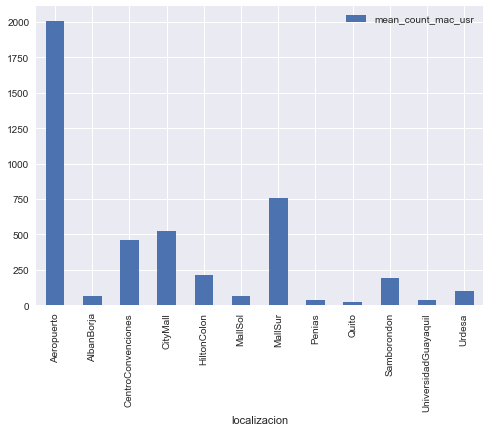

In [17]:
data4.plot(kind = "bar", x = "localizacion", y = "mean_count_mac_usr")
plt.title("Grafico de ")
plt.show()

# Variacion de conexiones al pasar los días

In [9]:
data2.head(2)

,mac_usr,fecha_x,hora,so,navegador,localizacion,hora2,fecha2,fechaCompleta,weekday,categoria_dia
0,94:01:C2:97:96:CB,2015-05-15,20:16:35,Android,SAFARI,Samborondon,20:00:00,2015-05,2015-05-15 20:00:00,4,Weekday
1,8C:BF:A6:17:60:A0,2015-05-15,20:18:15,Android,CHROME,Samborondon,20:00:00,2015-05,2015-05-15 20:00:00,4,Weekday


In [15]:
dataDias = data2[["mac_usr", "fecha_x", "weekday"]]

,mac_usr,fecha_x,weekday
0,94:01:C2:97:96:CB,2015-05-15,4
1,8C:BF:A6:17:60:A0,2015-05-15,4


In [11]:
dataDias = data2[["mac_usr", "fecha_x", "hora2"]]
dataDias = dataDias.groupby(["fecha_x", "hora2"]).count().add_prefix("count_").reset_index()
dataDias = dataDias.groupby(["hora2"]).mean().add_prefix("mean_").reset_index()
dataDias["conexiones_promedio"] = dataDias["mean_count_mac_usr"].apply(lambda x : int(round(x)))
dataDias["rangoHoras"] = dataDias["hora2"].apply(lambda hora: "["+ str(int(hora.split(":")[0])) 
                                                 + "h" + ", " + str(int(hora.split(":")[0]) + 1) + "h)")
dataDias

,hora2,mean_count_mac_usr,conexiones_promedio,rangoHoras
0,00:00:00,30.537975,31,"[0h, 1h)"
1,01:00:00,22.975225,23,"[1h, 2h)"
2,02:00:00,14.997579,15,"[2h, 3h)"
3,03:00:00,19.200000,19,"[3h, 4h)"
4,04:00:00,27.437158,27,"[4h, 5h)"
5,05:00:00,41.046512,41,"[5h, 6h)"
6,06:00:00,36.701531,37,"[6h, 7h)"
7,07:00:00,40.286031,40,"[7h, 8h)"
8,08:00:00,47.847107,48,"[8h, 9h)"
9,09:00:00,59.177914,59,"[9h, 10h)"


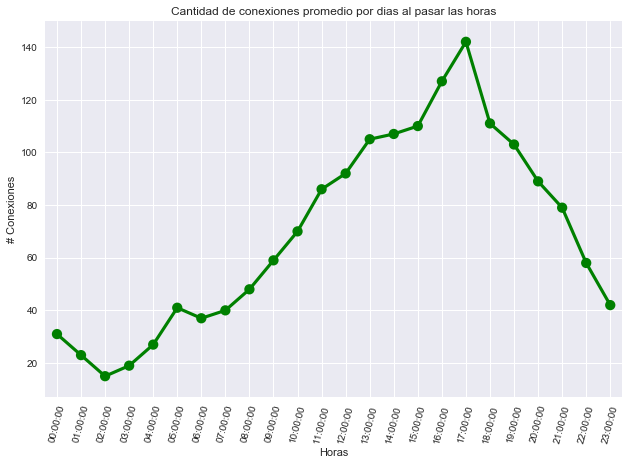

In [13]:
g = sns.factorplot(x="hora2", y="conexiones_promedio", data=dataDias, color = "Green", size=6, aspect=1.5)
plt.xticks(rotation=75)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio por dias al pasar las horas") 
plt.show()